# Linear Regression Problem
#### Setting
Consider two sets of points $A$ and $B$ in $\mathbb{R}^2$ space. Linear Regression fit on $A$  is $y = k_1x + y_1$, $k_1 > 0$; and Linear Regression fit on $B$ is $y = k_2x + y_2$, $k_2 > 0$.
#### Quesion
Is it true that Linear Regression fit on $A \cup B$ is $y = k_3x + y_3$ with $k_3 > 0$. If yes, then prove it. Provide examples otherwise. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

It is intuitively clear that to make $k_3$ negative points of one set should drag the slope downwards, while the others upwards. Let us specify such sets and fit them with Linear Regression model.

Text(0.5, 1.0, 'A and B')

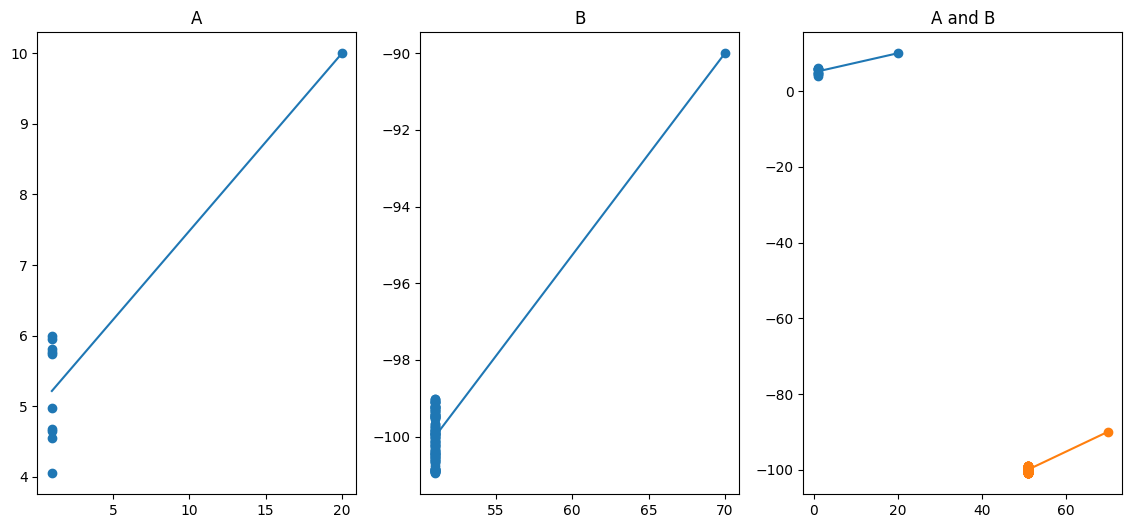

In [2]:
x_1 = np.concatenate([np.ones(10), [20]])
y_1 = np.concatenate([np.random.uniform(-1, 1, 10) + 5, [10]])
reg_1 = LinearRegression().fit(x_1.reshape(-1,1), y_1)
a_1, b_1 = reg_1.coef_[0], reg_1.intercept_


x_2 = np.concatenate([np.ones(100) + 50, [70]])
y_2 = np.concatenate([np.random.uniform(-1, 1, 100) - 100, [-90]])
reg_2 = LinearRegression().fit(x_2.reshape(-1,1), y_2)
a_2, b_2 = reg_2.coef_[0], reg_2.intercept_

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 6))
ax1.scatter(x_1, y_1)
ax1.plot(x_1, a_1*x_1 + b_1)
ax1.set_title('A')

ax2.scatter(x_2, y_2)
ax2.plot(x_2, a_2*x_2 + b_2)
ax2.set_title('B')

ax3.scatter(x_1, y_1)
ax3.scatter(x_2, y_2)
ax3.plot(x_1, a_1*x_1 + b_1)
ax3.plot(x_2, a_2*x_2 + b_2)
ax3.set_title('A and B')

Now let us fit Linear Gegression to $A \cup B$

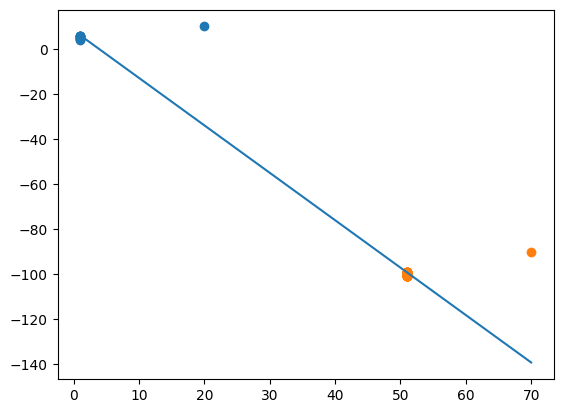

In [3]:
x_3 = np.concatenate([x_1, x_2])
y_3 = np.concatenate([y_1, y_2])

reg_3 = LinearRegression().fit(x_3.reshape(-1,1), y_3)
a_3, b_3 = reg_3.coef_[0], reg_3.intercept_

plt.scatter(x_1, y_1)
plt.scatter(x_2, y_2)
plt.plot(x_3, a_3*x_3 + b_3)

$k_3$ is indeed negative. The idea of situation in which it is negative is quite clear.<br>
But what if there are not so many points. For example what if there are only two points in each set? The idea is essentialy the same, so let us try to do recreate it.

Text(0.5, 1.0, 'A and B')

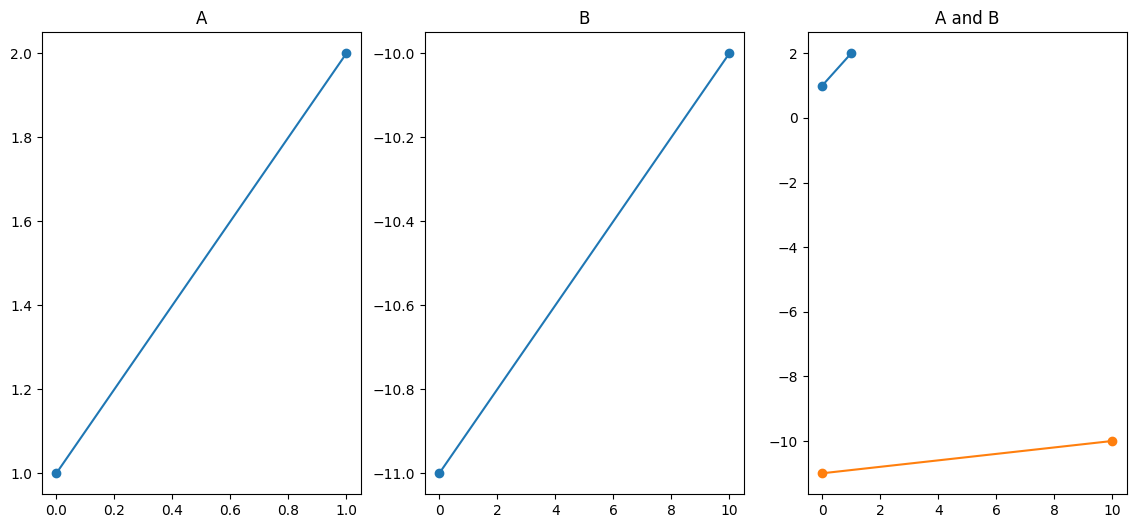

In [4]:
x_1 = np.array([0, 1])
y_1 = np.array([1, 2])
reg_1 = LinearRegression().fit(x_1.reshape(-1,1), y_1)
a_1, b_1 = reg_1.coef_[0], reg_1.intercept_

x_2 = np.array([0, 10])
y_2 = np.array([-11, -10])
reg_2 = LinearRegression().fit(x_2.reshape(-1,1), y_2)
a_2, b_2 = reg_2.coef_[0], reg_2.intercept_

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 6))
ax1.scatter(x_1, y_1)
ax1.plot(x_1, a_1*x_1 + b_1)
ax1.set_title('A')

ax2.scatter(x_2, y_2)
ax2.plot(x_2, a_2*x_2 + b_2)
ax2.set_title('B')

ax3.scatter(x_1, y_1)
ax3.scatter(x_2, y_2)
ax3.plot(x_1, a_1*x_1 + b_1)
ax3.plot(x_2, a_2*x_2 + b_2)
ax3.set_title('A and B')

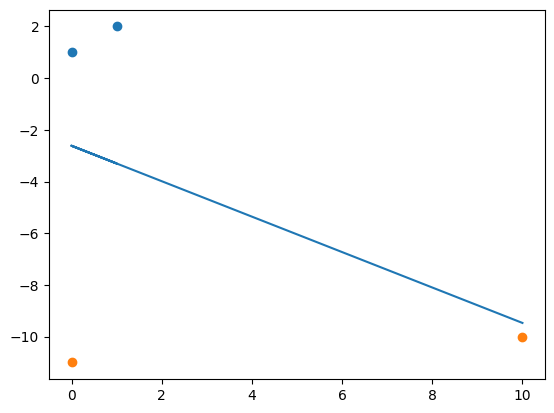

In [5]:
x_3 = np.concatenate([x_1, x_2])
y_3 = np.concatenate([y_1, y_2])

reg_3 = LinearRegression().fit(x_3.reshape(-1,1), y_3)
a_3, b_3 = reg_3.coef_[0], reg_3.intercept_

plt.scatter(x_1, y_1)
plt.scatter(x_2, y_2)
plt.plot(x_3, a_3*x_3 + b_3)

Now lets put the task to the extreme. What if there are two points in each set and one of them is the same: $A = \{ (x_0, y_0), (x_1, y_1)\}$, $B = \{ (x_0, y_0), (x_2, y_2)\}$.<br>
Now this task is not that trivial. It may be hard to give examples where $k_3$ is negative. But let us find what $k_3$ is equal to.

First we write the loss function (in our case we use Euclidian metric, but the case may be generalized to other metrics).<br><br>
$L(y_3, k_3) = (y_3)^2 + (y_3 + kx_1 - y_1)^2 + (y_3 + kx_2 - y_2)^2$

Now lets derive the necessary condition of extrema.<br><br>
$\frac{\partial L}{\partial y_0} = 2(y_0 + kx_1 - y_1) + 2(y_0 + kx_2 - y_2) + 2y_0 = 0$<br><br>
$\frac{\partial L}{\partial k} = 2x_1(y_0 + kx_1 - y_1) + 2x_2(y_0 + kx_2 - y_2) = 0$

You can check the sufficent condition of correspoding pair $(y_3, k_3)$ to be the minimum on your own. (Show that Hessian $\bold{H}_L|_{y_3,k_3}$ is positive-defined via Sylvester's criterion).

After some transformations we get<br><br>
$k = \frac{2x_1y_1 + 2x_2y_2 -x_1y_2 - x_2y_1}{2x_1^2 + 2x_2^2 - 2x_1x_2}$

The denominator is always positive:<br><br>
$x_1^2 + x_2^2 - x_1x_2 = //$ divide by $x_1x_2>0 //  = \frac{x_1}{x_2} + \frac{x_2}{x_1} - 1 = //z = \frac{x_1}{x_2}// = z + \frac{1}{z} - 1 \geq 1$

Tne numerator $2x_1y_1 + 2x_2y_2 -x_1y_2 - x_2y_1$ is not always positive, for example it is negative at <br><br>
$(x_1, y_1) = (1,10)$<br>
$(x_2, y_2) = (10,1)$

We have found $A$ and $B$ such that $k_3$ is negative. Lets now plot this.

Text(0.5, 1.0, 'A and B')

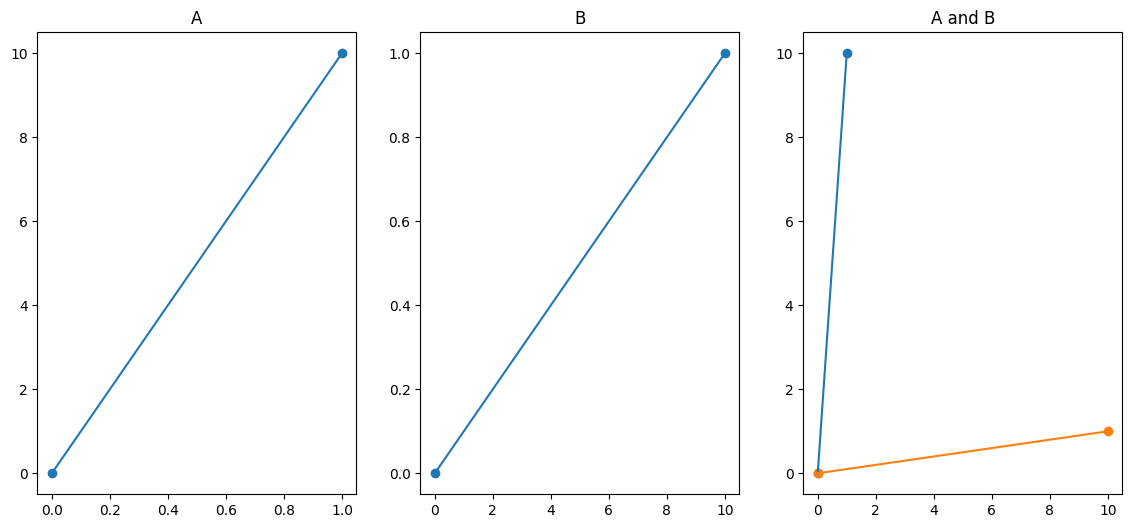

In [6]:
x_1 = np.array([0, 1])
y_1 = np.array([0, 10])
reg_1 = LinearRegression().fit(x_1.reshape(-1,1), y_1)
a_1, b_1 = reg_1.coef_[0], reg_1.intercept_

x_2 = np.array([0, 10])
y_2 = np.array([0, 1])
reg_2 = LinearRegression().fit(x_2.reshape(-1,1), y_2)
a_2, b_2 = reg_2.coef_[0], reg_2.intercept_

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 6))
ax1.scatter(x_1, y_1)
ax1.plot(x_1, a_1*x_1 + b_1)
ax1.set_title('A')

ax2.scatter(x_2, y_2)
ax2.plot(x_2, a_2*x_2 + b_2)
ax2.set_title('B')

ax3.scatter(x_1, y_1)
ax3.scatter(x_2, y_2)
ax3.plot(x_1, a_1*x_1 + b_1)
ax3.plot(x_2, a_2*x_2 + b_2)
ax3.set_title('A and B')

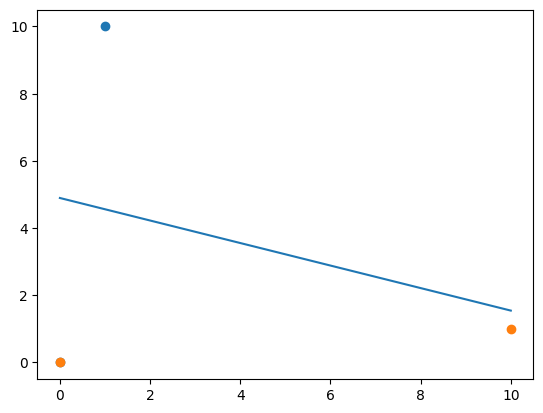

In [7]:
x_3 = np.array([0, 1, 10])
y_3 = np.array([0, 10, 1])

reg_3 = LinearRegression().fit(x_3.reshape(-1,1), y_3)
a_3, b_3 = reg_3.coef_[0], reg_3.intercept_

plt.scatter(x_1, y_1)
plt.scatter(x_2, y_2)
plt.plot(x_3, a_3*x_3 + b_3)

Congratulations. Hope it was an interesting Linear Regression Problem.